In [1]:
!pip install kaggle
#install kaggle library to make it easier to move the data to it vis kaggle api

In [2]:
#upload the credentials of the kaggle account

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmednagydewair","key":"b2f6a175b4a9298cbffeb5fc4a0059d3"}'}

In [0]:

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:

#import the dataset we want to use for our project
!kaggle datasets download -d datamunge/sign-language-mnist

 16% 5.00M/30.8M [00:00<00:00, 31.7MB/s]
100% 30.8M/30.8M [00:00<00:00, 120MB/s] 


In [5]:
!ls
# they downloaded by default in the default path.content/sign-language-mnist

kaggle.json  sample_data  sign-language-mnist.zip


In [0]:
#extract the main folder form it's main directory to "tmp" folder based in ..
import os
import zipfile

local_zip = '/content/sign-language-mnist.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp'
#tmp/sign_mnist_test.csv

In [0]:
import pandas as pd
train_df = pd.read_csv('/tmp/sign_mnist_train.csv' ,skiprows=1)
test_df  = pd.read_csv('/tmp/sign_mnist_test.csv' ,skiprows=1) 

In [9]:
train_df.head()

,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170.1,171,171.1,171.2,172,171.3,171.4,170.2,170.3,169,111,121,129,135,141,144,148,151,154,157,160.1,...,205.1,206,206.1,207,207.1,206.2,206.3,204.4,205.2,204.5,203.7,202.12,142.6,151.7,160.8,172.28,196.5,188.5,188.6,190.7,135.5,96.5,86.1,77,77.1,79.4,176.6,205.3,207.2,207.3,207.4,207.5,207.6,207.7,206.4,206.5,206.6,204.6,203.8,202.13
0,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
1,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
2,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
3,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
4,16,161,168,172,173,178,184,189,193,196,202,206,208,212,214,217,219,220,222,226,227,227,228,231,231,231,230,231,233,163,169,171,174,179,185,190,194,198,203,208,...,70,71,73,69,64,56,51,56,41,216,255,255,186,189,191,197,205,211,216,219,232,205,147,137,118,99,79,75,78,77,76,74,68,62,53,55,48,238,255,255


In [10]:
print (train_df.shape)
print (test_df.shape)

(27454, 785)
(7171, 785)


In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


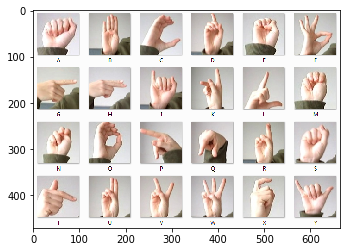

In [12]:
image = load_img("../tmp/amer_sign2.png")
plt.imshow(image)

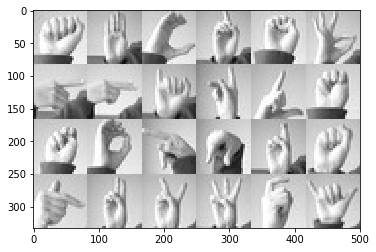

In [13]:
image = load_img("../tmp/amer_sign3.png")
plt.imshow(image)

- the image is 784 pixels , which mean to 28*28 pixels .and we should normalize it to 255.
- should split the first column"label" , to reshape the reset columns .

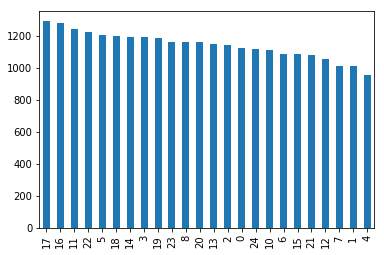

In [14]:
train_df.iloc[:,0].value_counts().plot.bar()

In [0]:
temp_images = []
temp_labels = []

#select the first column of the data frame in the labels and the rest in the data
# resize the image to be (28*28) , #and save it to the image list 
for index, row in train_df.iterrows():

  temp_labels.append(row[0])
  image_data = row[1:785]
  image_data_as_array = np.array_split(image_data, 28)
  temp_images.append(image_data_as_array)



## register the images as 2d arrays

In [0]:
train_images = np.array(temp_images).astype('float')
train_labels = np.array(temp_labels).astype('float')

In [0]:
temp_images = []
temp_labels = []

#select the first column of the data frame in the labels and the rest in the data
# resize the image to be (28*28) , #and save it to the image list 
for index, row in test_df.iterrows():

  temp_labels.append(row[0])
  image_data = row[1:785]
  image_data_as_array = np.array_split(image_data, 28)
  temp_images.append(image_data_as_array)


test_images = np.array(temp_images).astype('float')
test_labels = np.array(temp_labels).astype('float')


In [18]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(27454, 28, 28)
(27454,)
(7171, 28, 28)
(7171,)


### now we have created 2 float arrays each element is concern with one training image .and the same have been done inthe test images.

In [0]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)



In [0]:
import tensorflow as tf

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0620 10:36:41.751376 139708273407872 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                            steps_per_epoch=len(train_images) / 32,
                            epochs=15,
                            validation_data=validation_datagen.flow(test_images, test_labels, batch_size=32),
                            validation_steps=len(test_images) / 32)


Epoch 1/15
858/857 [==============================] - 13s 15ms/step - loss: 2.8628 - acc: 0.1380 - val_loss: 2.3427 - val_acc: 0.2701
Epoch 2/15
858/857 [==============================] - 9s 11ms/step - loss: 2.1487 - acc: 0.3201 - val_loss: 1.5670 - val_acc: 0.4711
Epoch 3/15
858/857 [==============================] - 10s 11ms/step - loss: 1.7984 - acc: 0.4216 - val_loss: 1.2823 - val_acc: 0.5567
Epoch 4/15
858/857 [==============================] - 10s 11ms/step - loss: 1.5557 - acc: 0.4974 - val_loss: 1.2930 - val_acc: 0.5716
Epoch 5/15
858/857 [==============================] - 10s 11ms/step - loss: 1.4124 - acc: 0.5409 - val_loss: 0.9575 - val_acc: 0.6629
Epoch 6/15
858/857 [==============================] - 10s 11ms/step - loss: 1.2901 - acc: 0.5778 - val_loss: 0.8793 - val_acc: 0.6942
Epoch 7/15
858/857 [==============================] - 9s 11ms/step - loss: 1.1880 - acc: 0.6083 - val_loss: 0.7816 - val_acc: 0.7229
Epoch 8/15
858/857 [==============================] - 9s 11ms/st

as it shown in the above results there existing underfitting in the results , i think about use here transfer learning ,but it will be invain here . 

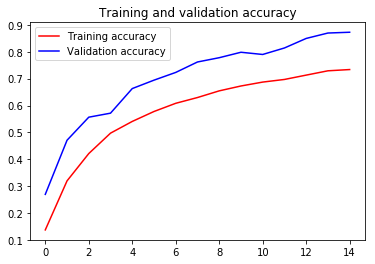

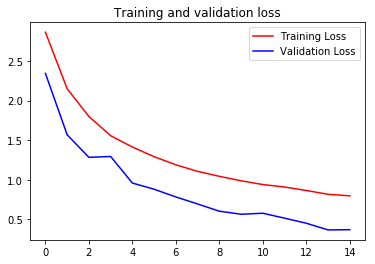

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### I will remove the augmentation steps , because I think it will be misleading towards the target  . we will be enough with the rescale images only . 

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                            steps_per_epoch=len(train_images) / 32,
                            epochs=15,
                            validation_data=validation_datagen.flow(test_images, test_labels, batch_size=32),
                            validation_steps=len(test_images) / 32)


Epoch 1/15
858/857 [==============================] - 5s 5ms/step - loss: 7.3926e-07 - acc: 1.0000 - val_loss: 0.5703 - val_acc: 0.9301
Epoch 2/15
858/857 [==============================] - 4s 5ms/step - loss: 4.8530e-07 - acc: 1.0000 - val_loss: 0.5785 - val_acc: 0.9300
Epoch 3/15
858/857 [==============================] - 4s 5ms/step - loss: 3.2239e-07 - acc: 1.0000 - val_loss: 0.5829 - val_acc: 0.9314
Epoch 4/15
858/857 [==============================] - 4s 5ms/step - loss: 2.0885e-07 - acc: 1.0000 - val_loss: 0.6000 - val_acc: 0.9314
Epoch 5/15
858/857 [==============================] - 4s 5ms/step - loss: 1.3717e-07 - acc: 1.0000 - val_loss: 0.6077 - val_acc: 0.9331
Epoch 6/15
858/857 [==============================] - 4s 5ms/step - loss: 8.8180e-08 - acc: 1.0000 - val_loss: 0.6113 - val_acc: 0.9340
Epoch 7/15
858/857 [==============================] - 4s 5ms/step - loss: 5.7577e-08 - acc: 1.0000 - val_loss: 0.6257 - val_acc: 0.9333
Epoch 8/15
858/857 [============================

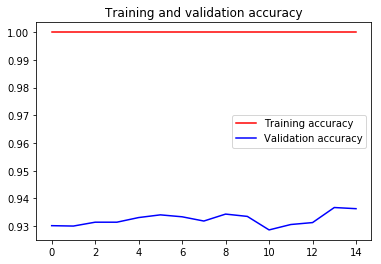

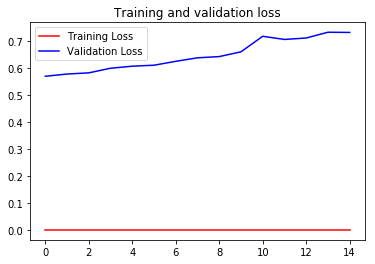

In [37]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
## it may lead us to overfitting results 